## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import squarify


## reading the dataset

In [3]:
df = pd.read_csv('flo_data_20k.csv')

In [4]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


In [5]:
df.shape

(19945, 12)

## stats

In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


# Data cleaning

### checking nulls 

In [7]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

### checking data types

In [8]:
df.dtypes

master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object

In [9]:
df["total_of_purchases"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]


In [10]:
df["total_expenditure"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]

In [11]:
df

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_of_purchases,total_expenditure
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,Android App,Offline,2019-09-21,2020-07-05,2020-06-05,2020-07-05,1.0,2.0,289.98,111.98,"[ERKEK, AKTIFSPOR]",3.0,401.96
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,Desktop,Desktop,2020-03-01,2020-12-22,2020-12-22,2020-03-01,1.0,1.0,150.48,239.99,[AKTIFSPOR],2.0,390.47
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-09-11,2021-05-24,2021-05-24,2019-09-11,2.0,1.0,139.98,492.96,[AKTIFSPOR],3.0,632.94
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,Android App,Android App,2019-03-27,2021-02-13,2021-02-13,2021-01-08,1.0,5.0,711.79,297.98,"[ERKEK, AKTIFSPOR]",6.0,1009.77


In [12]:
df.nunique()

master_id                            19945
order_channel                            4
last_order_channel                       5
first_order_date                      2465
last_order_date                        366
last_order_date_online                1743
last_order_date_offline                738
order_num_total_ever_online             57
order_num_total_ever_offline            32
customer_value_total_ever_offline     6097
customer_value_total_ever_online     11292
interested_in_categories_12             32
total_of_purchases                      63
total_expenditure                    16277
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

## Convert
* first_order_date --------------> object
* last_order_date --------------> object
* last_order_date_online --------------> object
* last_order_date_offline --------------> object

In [14]:
# Converting the above mentioned column types from object to datetime format
convert =["first_order_date","last_order_date","last_order_date_online","last_order_date_offline"]
df[convert] = df[convert].apply(pd.to_datetime)

In [15]:
df.order_channel.value_counts()

Android App    9495
Mobile         4882
Ios App        2833
Desktop        2735
Name: order_channel, dtype: int64

In [16]:
df.last_order_channel.value_counts()

Android App    6783
Offline        6608
Mobile         3172
Ios App        1696
Desktop        1686
Name: last_order_channel, dtype: int64

## Data visualization

### Distribution of the number of customers in the shopping channels

In [17]:
# the total number of products purchased and the total expenditures.

distribution=df.groupby("order_channel").agg({"master_id":"nunique",
                                 "total_of_purchases":"sum",
                                 "total_expenditure":"sum"})
distribution.reset_index()

,order_channel,master_id,total_of_purchases,total_expenditure
0,Android App,9495,52269.0,7819062.76
1,Desktop,2735,10920.0,1610321.46
2,Ios App,2833,15351.0,2525999.93
3,Mobile,4882,21679.0,3028183.16


## total purchases v/s order channel

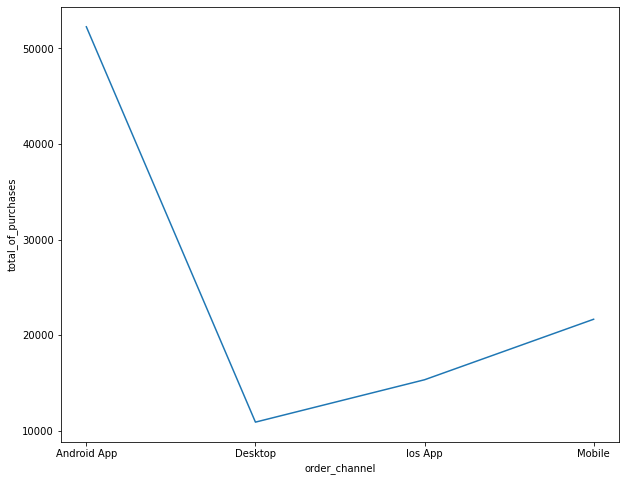

In [18]:
plt.figure(figsize=(10,8))
sns.lineplot(data=distribution,x='order_channel',y='total_of_purchases')
plt.show(block=True)



## total expenditure v/s order channel

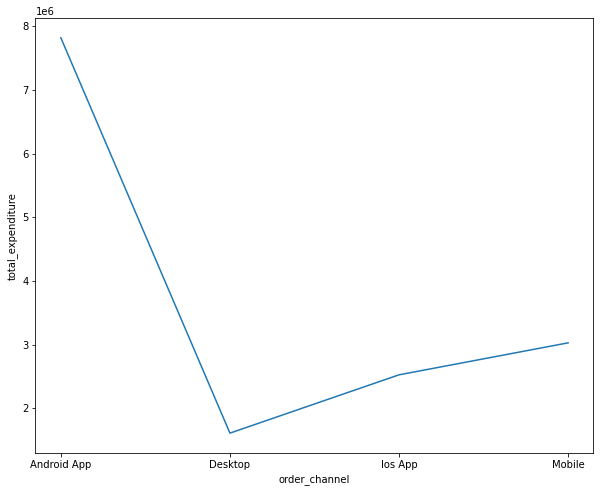

In [19]:
plt.figure(figsize=(10,8))
sns.lineplot(data=distribution,x='order_channel',y='total_expenditure')
plt.show(block=True)


## Top 10 shoppers with most revenue

In [20]:
 
Top_10_shoppers=df.groupby('master_id').agg({'total_expenditure': 'sum'}).\
    sort_values(by='total_expenditure', ascending=False).head(10)
Top_10_shoppers.reset_index().head(10)

,master_id,total_expenditure
0,5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.10
1,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.29
2,73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.10
3,7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.41
4,47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.34
5,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.57
6,d696c654-2633-11ea-8e1c-000d3a38a36f,16918.57
7,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,12726.10
8,cba59206-9dd1-11e9-9897-000d3a38a36f,12282.24
9,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,12103.15


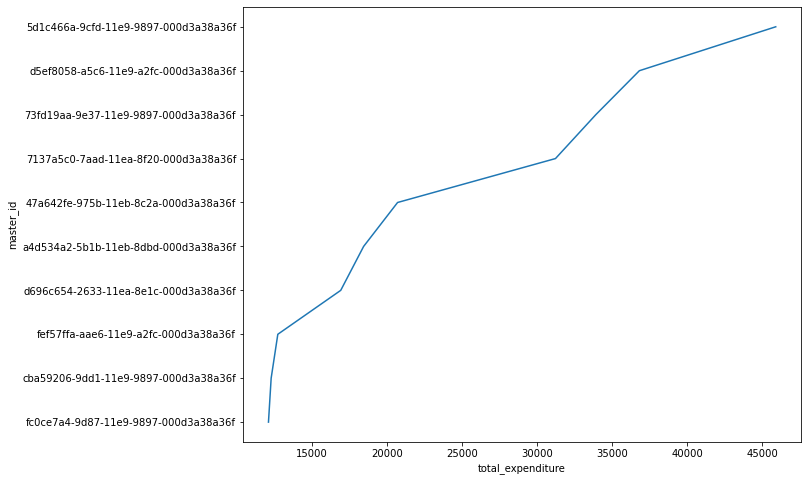

In [21]:
plt.figure(figsize=(10,8))
sns.lineplot(data=Top_10_shoppers,y='master_id',x='total_expenditure')
plt.show(block=True)

## Top 10 customers with the most orders 

In [22]:

Top_10_customers=most_orders=df.groupby('master_id').agg({'total_of_purchases': 'sum'}).\
    sort_values(by='total_of_purchases', ascending=False).head(10)
most_orders
Top_10_customers.reset_index().head(10)

,master_id,total_of_purchases
0,5d1c466a-9cfd-11e9-9897-000d3a38a36f,202.0
1,cba59206-9dd1-11e9-9897-000d3a38a36f,131.0
2,a57f4302-b1a8-11e9-89fa-000d3a38a36f,111.0
3,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,88.0
4,329968c6-a0e2-11e9-a2fc-000d3a38a36f,83.0
5,73fd19aa-9e37-11e9-9897-000d3a38a36f,82.0
6,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,77.0
7,b27e241a-a901-11e9-a2fc-000d3a38a36f,75.0
8,d696c654-2633-11ea-8e1c-000d3a38a36f,70.0
9,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,70.0


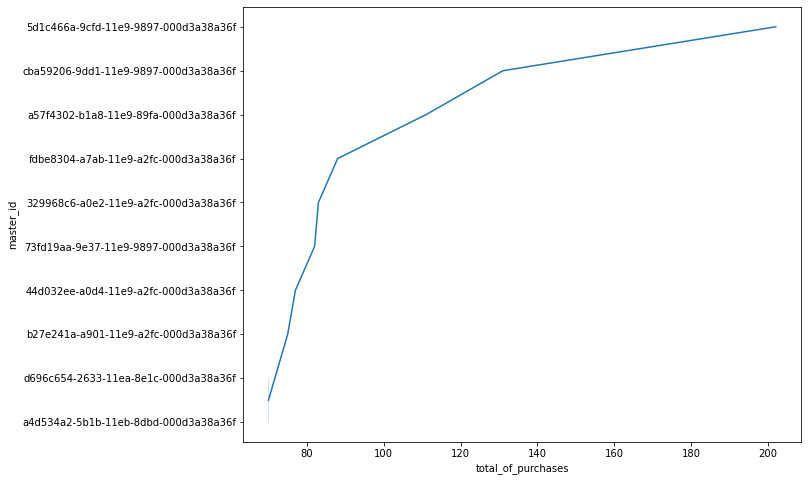

In [23]:
plt.figure(figsize=(10,8))
sns.lineplot(data=Top_10_customers,y='master_id',x='total_of_purchases')
plt.show(block=True)

##  Total spend by customers, both online and offline

In [24]:

df.groupby("master_id")["total_expenditure"].sum().sort_values(ascending=False).head()

master_id
5d1c466a-9cfd-11e9-9897-000d3a38a36f    45905.10
d5ef8058-a5c6-11e9-a2fc-000d3a38a36f    36818.29
73fd19aa-9e37-11e9-9897-000d3a38a36f    33918.10
7137a5c0-7aad-11ea-8f20-000d3a38a36f    31227.41
47a642fe-975b-11eb-8c2a-000d3a38a36f    20706.34
Name: total_expenditure, dtype: float64

## Total spend by customers in offline mode

In [25]:
df.groupby("master_id")["customer_value_total_ever_offline"].sum().sort_values(ascending=False).head()

master_id
47a642fe-975b-11eb-8c2a-000d3a38a36f    18119.14
a57f4302-b1a8-11e9-89fa-000d3a38a36f    10239.46
fdbe8304-a7ab-11e9-a2fc-000d3a38a36f     8432.25
695889b4-d6ed-11e9-93bc-000d3a38a36f     7247.60
44d032ee-a0d4-11e9-a2fc-000d3a38a36f     4640.77
Name: customer_value_total_ever_offline, dtype: float64

## Total spend by customers in online 

In [26]:
df.groupby("master_id")["customer_value_total_ever_online"].sum().sort_values(ascending=False).head()

master_id
5d1c466a-9cfd-11e9-9897-000d3a38a36f    45220.13
d5ef8058-a5c6-11e9-a2fc-000d3a38a36f    36687.80
73fd19aa-9e37-11e9-9897-000d3a38a36f    32654.34
7137a5c0-7aad-11ea-8f20-000d3a38a36f    30688.47
a4d534a2-5b1b-11eb-8dbd-000d3a38a36f    17599.89
Name: customer_value_total_ever_online, dtype: float64

## Total cost of purchase per year (one year!)

In [27]:

one_year = df.groupby("interested_in_categories_12")["total_expenditure"].sum().sort_values(ascending=False).reset_index().head()
one_year

,interested_in_categories_12,total_expenditure
0,[AKTIFSPOR],2373965.87
1,[KADIN],1139066.02
2,[],1136553.55
3,"[KADIN, AKTIFSPOR]",1132049.56
4,[ERKEK],1106934.44


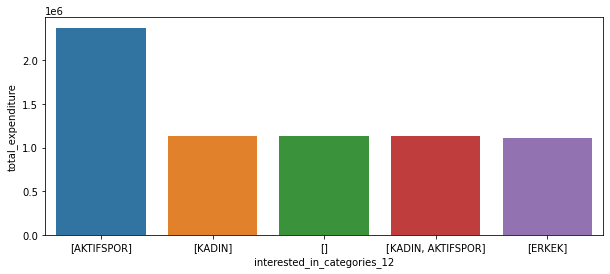

In [28]:
plt.figure(figsize=(10,4))
sns.barplot(data=one_year,x='interested_in_categories_12',y='total_expenditure')
plt.show(block=True)

# RFM ANALYSIS

### RFM METRİCS

In [29]:
# Last analysis date
last_tmsp = df["last_order_date"].max() #Timestamp('2021-05-30 00:00:00')

type(last_tmsp)

pandas._libs.tslibs.timestamps.Timestamp

In [30]:
# Recency Date
af_date = dt.datetime(2021,7,1)
type(af_date)

datetime.datetime

In [31]:
rfm = df.groupby('master_id').agg({'last_order_date': lambda last_order_date: (af_date - last_order_date.max()).days,
                                     'total_of_purchases': lambda total_of_purchases: total_of_purchases.sum(),
                                     'total_expenditure': lambda total_expenditure: total_expenditure.sum()})

In [32]:
rfm.reset_index().head()

,master_id,last_order_date,total_of_purchases,total_expenditure
0,00016786-2f5a-11ea-bb80-000d3a38a36f,40,5.0,776.07
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,328,3.0,269.47
2,000be838-85df-11ea-a90b-000d3a38a36f,243,4.0,722.69
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,57,7.0,874.16
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,50,7.0,1620.33


In [33]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [34]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,19945.0,164.458360,103.281149,32.00,73.00,141.00,232.00,397.0
Frequency,19945.0,5.024768,4.742707,2.00,3.00,4.00,6.00,202.0
Monetary,19945.0,751.244287,895.402173,44.98,339.98,545.27,897.78,45905.1


## Creating RFM SCORE 

In [35]:
# Converting RFM Scores to a Range of 1-5 without breaking the normal distribution.

rfm["recency_score"]=pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1])

rfm["frequency_score"] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["monetary_score"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [36]:
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
master_id,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,40,5.0,776.07,5,4,4
00034aaa-a838-11e9-a2fc-000d3a38a36f,328,3.0,269.47,1,2,1
000be838-85df-11ea-a90b-000d3a38a36f,243,4.0,722.69,2,3,4
000c1fe2-a8b7-11ea-8479-000d3a38a36f,57,7.0,874.16,5,4,4
000f5e3e-9dde-11ea-80cd-000d3a38a36f,50,7.0,1620.33,5,4,5


### Recency,Frequency,Monetary Metrics ---> RFM SCORE {(Concat)}

In [37]:
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str))

In [38]:
# example filter
rfm[rfm["RFM_SCORE"]=="545"].reset_index().head()

,master_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
0,000f5e3e-9dde-11ea-80cd-000d3a38a36f,50,7.0,1620.33,5,4,5,545
1,009e2910-1252-11ea-a001-000d3a38a36f,58,7.0,1109.60,5,4,5,545
2,01949f34-8633-11ea-be76-000d3a38a36f,45,5.0,1339.78,5,4,5,545
3,0485425c-ac40-11e9-a2fc-000d3a38a36f,61,6.0,1240.04,5,4,5,545
4,0517a698-a4fb-11e9-a2fc-000d3a38a36f,60,6.0,1189.94,5,4,5,545


## Customer Segmentation

In [39]:
# Regex

seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

seg_map

{'[1-2][1-2]': 'hibernating',
 '[1-2][3-4]': 'at_Risk',
 '[1-2]5': 'cant_loose',
 '3[1-2]': 'about_to_sleep',
 '33': 'need_attention',
 '[3-4][4-5]': 'loyal_customers',
 '41': 'promising',
 '51': 'new_customers',
 '[4-5][2-3]': 'potential_loyalists',
 '5[4-5]': 'champions'}

In [40]:
# seg_map include dataframe

rfm['Segment'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str)

rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)

rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,Segment
master_id,,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,40,5.0,776.07,5,4,4,544,champions
00034aaa-a838-11e9-a2fc-000d3a38a36f,328,3.0,269.47,1,2,1,121,hibernating
000be838-85df-11ea-a90b-000d3a38a36f,243,4.0,722.69,2,3,4,234,at_Risk
000c1fe2-a8b7-11ea-8479-000d3a38a36f,57,7.0,874.16,5,4,4,544,champions
000f5e3e-9dde-11ea-80cd-000d3a38a36f,50,7.0,1620.33,5,4,5,545,champions


In [41]:
rfm[rfm['RFM_SCORE'] == '555'].head(3)

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,Segment
master_id,,,,,,,,
004d5204-2037-11ea-87bf-000d3a38a36f,57,8.0,1170.76,5,5,5,555,champions
00b3ee24-aa44-11e9-a2fc-000d3a38a36f,54,8.0,2027.78,5,5,5,555,champions
00cf8494-9da2-11e9-9897-000d3a38a36f,35,53.0,6275.33,5,5,5,555,champions


## Examine the distribut. of segments

In [42]:


rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count"])

Recency        Frequency           Monetary      
                           mean count       mean count         mean count
Segment                                                                  
about_to_sleep       144.031649  1643   2.406573  1643   361.649373  1643
at_Risk              272.328997  3152   4.470178  3152   648.325038  3152
cant_loose           265.159129  1194  10.716918  1194  1481.652446  1194
champions             47.142187  1920   8.965104  1920  1410.708938  1920
hibernating          277.426303  3589   2.391474  3589   362.583299  3589
loyal_customers      112.557926  3375   8.356444  3375  1216.257224  3375
need_attention       143.037221   806   3.739454   806   553.436638   806
new_customers         47.976226   673   2.000000   673   344.049495   673
potential_loyalists   66.869744  2925   3.310769  2925   533.741344  2925
promising             88.694611   668   2.000000   668   334.153338   668

## Segmentation Graph

In [43]:

Segments = rfm['Segment'].value_counts().sort_values(ascending=False)
Segments

hibernating            3589
loyal_customers        3375
at_Risk                3152
potential_loyalists    2925
champions              1920
about_to_sleep         1643
cant_loose             1194
need_attention          806
new_customers           673
promising               668
Name: Segment, dtype: int64

#### TREE MAP

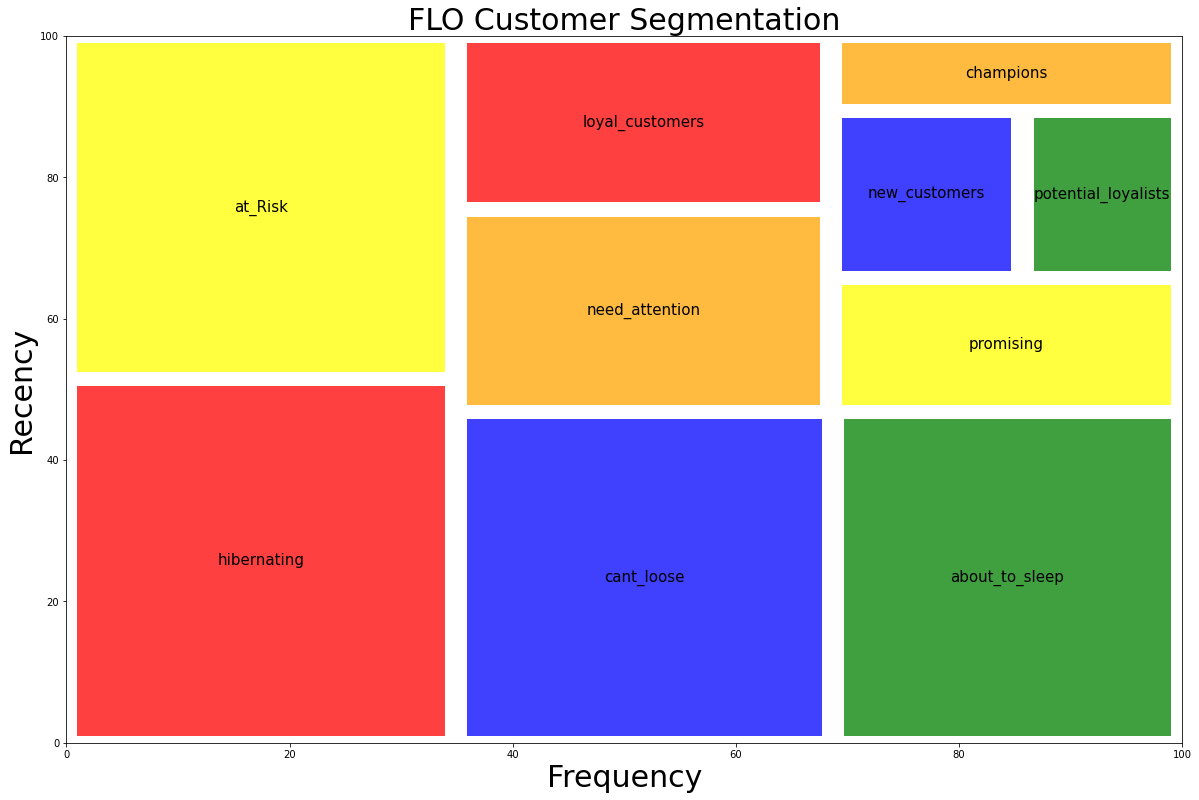

In [44]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 13)

squarify.plot(sizes=Segments,
              label=['hibernating',
                     'at_Risk',
                     'cant_loose',
                     'about_to_sleep',
                     'need_attention',
                     'loyal_customers',
                     'promising',
                     'new_customers',
                     'potential_loyalists',
                     'champions'],color=["red","yellow","blue", "green","orange"],pad=True, 
              bar_kwargs={'alpha':.75}, text_kwargs={'fontsize':15})
plt.title("FLO Customer Segmentation",fontsize=30)
plt.xlabel('Frequency', fontsize=30)
plt.ylabel('Recency', fontsize=30)
plt.show()

## Scatter plot for recency v/s monetary

<Figure size 576x504 with 0 Axes>

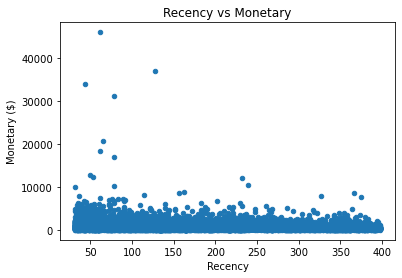

In [45]:
plt.figure(figsize=(8,7))
rfm.plot.scatter(x='Recency' , y='Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary ($)')
plt.title('Recency vs Monetary')
plt.show()

## Scatter plot for frequency v/s moentary

<Figure size 576x504 with 0 Axes>

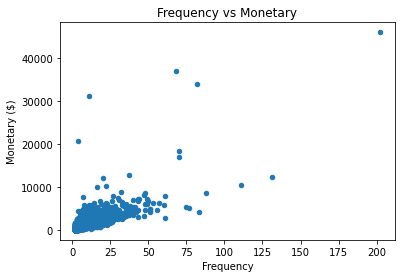

In [46]:
plt.figure(figsize=(8,7))
rfm.plot.scatter(x='Frequency' , y='Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary ($)')
plt.title('Frequency vs Monetary')
plt.show()

## Q-Q  plot of the quantiles of x versus the quantiles/ppf of a distribution.

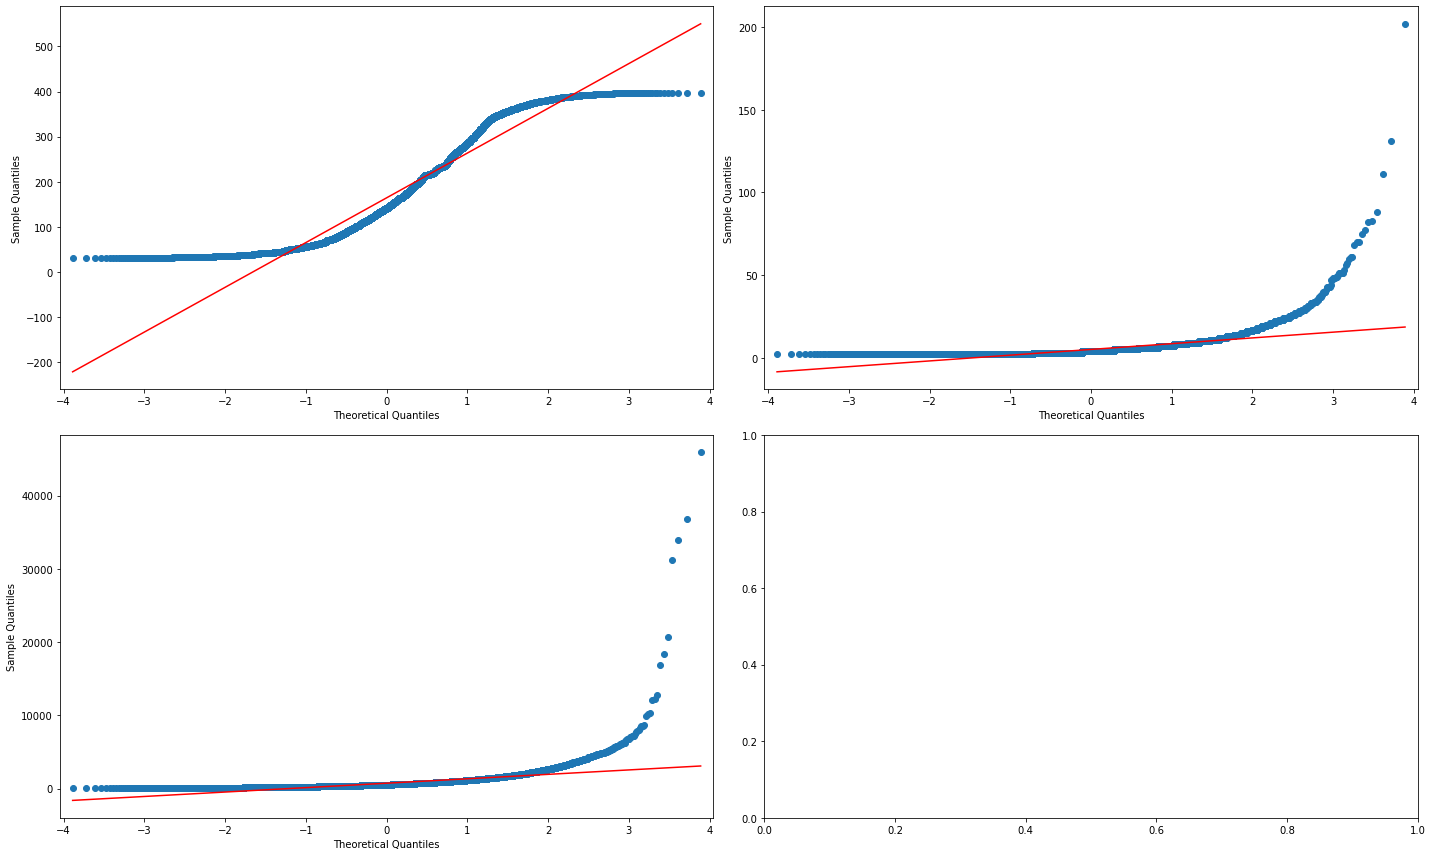

In [47]:

from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot as plt
f, axes = plt.subplots(2, 2, figsize=(20,12))

#define distribution graphs
qqplot(rfm.Recency, line='r', ax=axes[0,0], label='Recency')
qqplot(rfm.Frequency, line='r', ax=axes[0,1], label='Frequency')
qqplot(rfm.Monetary, line='r', ax=axes[1,0], label='MonetaryValue')

#plot all
plt.tight_layout()

## CASES 
### -CASE 1:
 A new women's shoe brand will be included. The target audience (champions,loyal_customers) and women are determined as shoppers. We need access to the id numbers of these customers.

In [48]:
SEGMENT_A = rfm[(rfm["Segment"]=="champions") | (rfm["Segment"]=="loyal_customers")]
SEGMENT_A.shape[0] 

5295

In [49]:
SEGMENT_B = df[(df["interested_in_categories_12"]).str.contains("KADIN")] #7603
SEGMENT_B.shape[0] 

7603

In [50]:
one_case = pd.merge(SEGMENT_A,SEGMENT_B[["interested_in_categories_12","master_id"]],on=["master_id"])
one_case.head()

,master_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,Segment,interested_in_categories_12
0,000c1fe2-a8b7-11ea-8479-000d3a38a36f,57,7.0,874.16,5,4,4,544,champions,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]"
1,003903e0-abce-11e9-a2fc-000d3a38a36f,98,5.0,577.47,4,4,3,443,loyal_customers,[KADIN]
2,004bec18-9f7a-11e9-a2fc-000d3a38a36f,129,12.0,684.91,3,5,4,354,loyal_customers,"[ERKEK, KADIN, AKTIFSPOR]"
3,00534fe4-a6b4-11e9-a2fc-000d3a38a36f,93,16.0,800.59,4,5,4,454,loyal_customers,"[ERKEK, KADIN, AKTIFSPOR]"
4,009293fe-1f3e-11ea-87bf-000d3a38a36f,159,6.0,725.18,3,4,4,344,loyal_customers,"[COCUK, KADIN, AKTIFSPOR]"


In [51]:
#one_case= one_case.drop(one_case.loc[:,'Recency':'interested_in_categories_12'].columns,axis=1)


In [52]:
# Turn the csv format
one_case.to_csv("one_case_customer_information_1.csv")

## CASE 2:
A 40% discount on men's and children's products is planned. The target audience is (cant_loose, about_to_sleep, new_customers). We need to access the id numbers of these customers.

In [53]:
SEGMENT_C = rfm[(rfm["Segment"]=="cant_loose") | (rfm["Segment"]=="about_to_sleep") | (rfm["Segment"]=="new_customers")]

SEGMENT_D = df[(df["interested_in_categories_12"]).str.contains("ERKEK|COCUK")]

In [54]:
second_case = pd.merge(SEGMENT_C,SEGMENT_D[["interested_in_categories_12","master_id"]],on=["master_id"])

In [55]:
#second_case= second_case.drop(second_case.loc[:,'Recency':'interested_in_categories_12'].columns,axis=1)

In [56]:
# Turn the csv format

second_case.to_csv("second_case_customer_information_2.csv",index=False)